Name : Kunal Mody

Batch : DS2312

## Census Income
#### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

A set of reasonably clean records was extracted using the following conditions: 

((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

#### The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. 

We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [294]:
df =pd.read_csv('Census Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [295]:
df.head(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [296]:
df.tail(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [297]:
df.shape

(32560, 15)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [299]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [300]:
# There are no null values i datset

<Axes: >

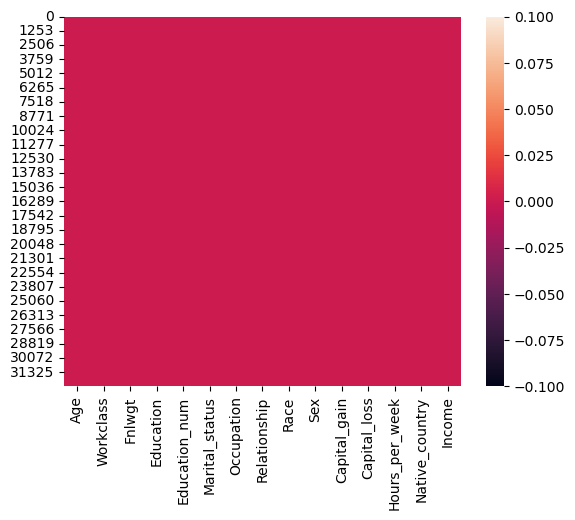

In [301]:
sns.heatmap(df.isnull())

In [302]:
# checking for unique values
df.nunique().to_frame('Total Unique values')

,Total Unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [303]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [304]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [305]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [306]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [307]:
df['Fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [308]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


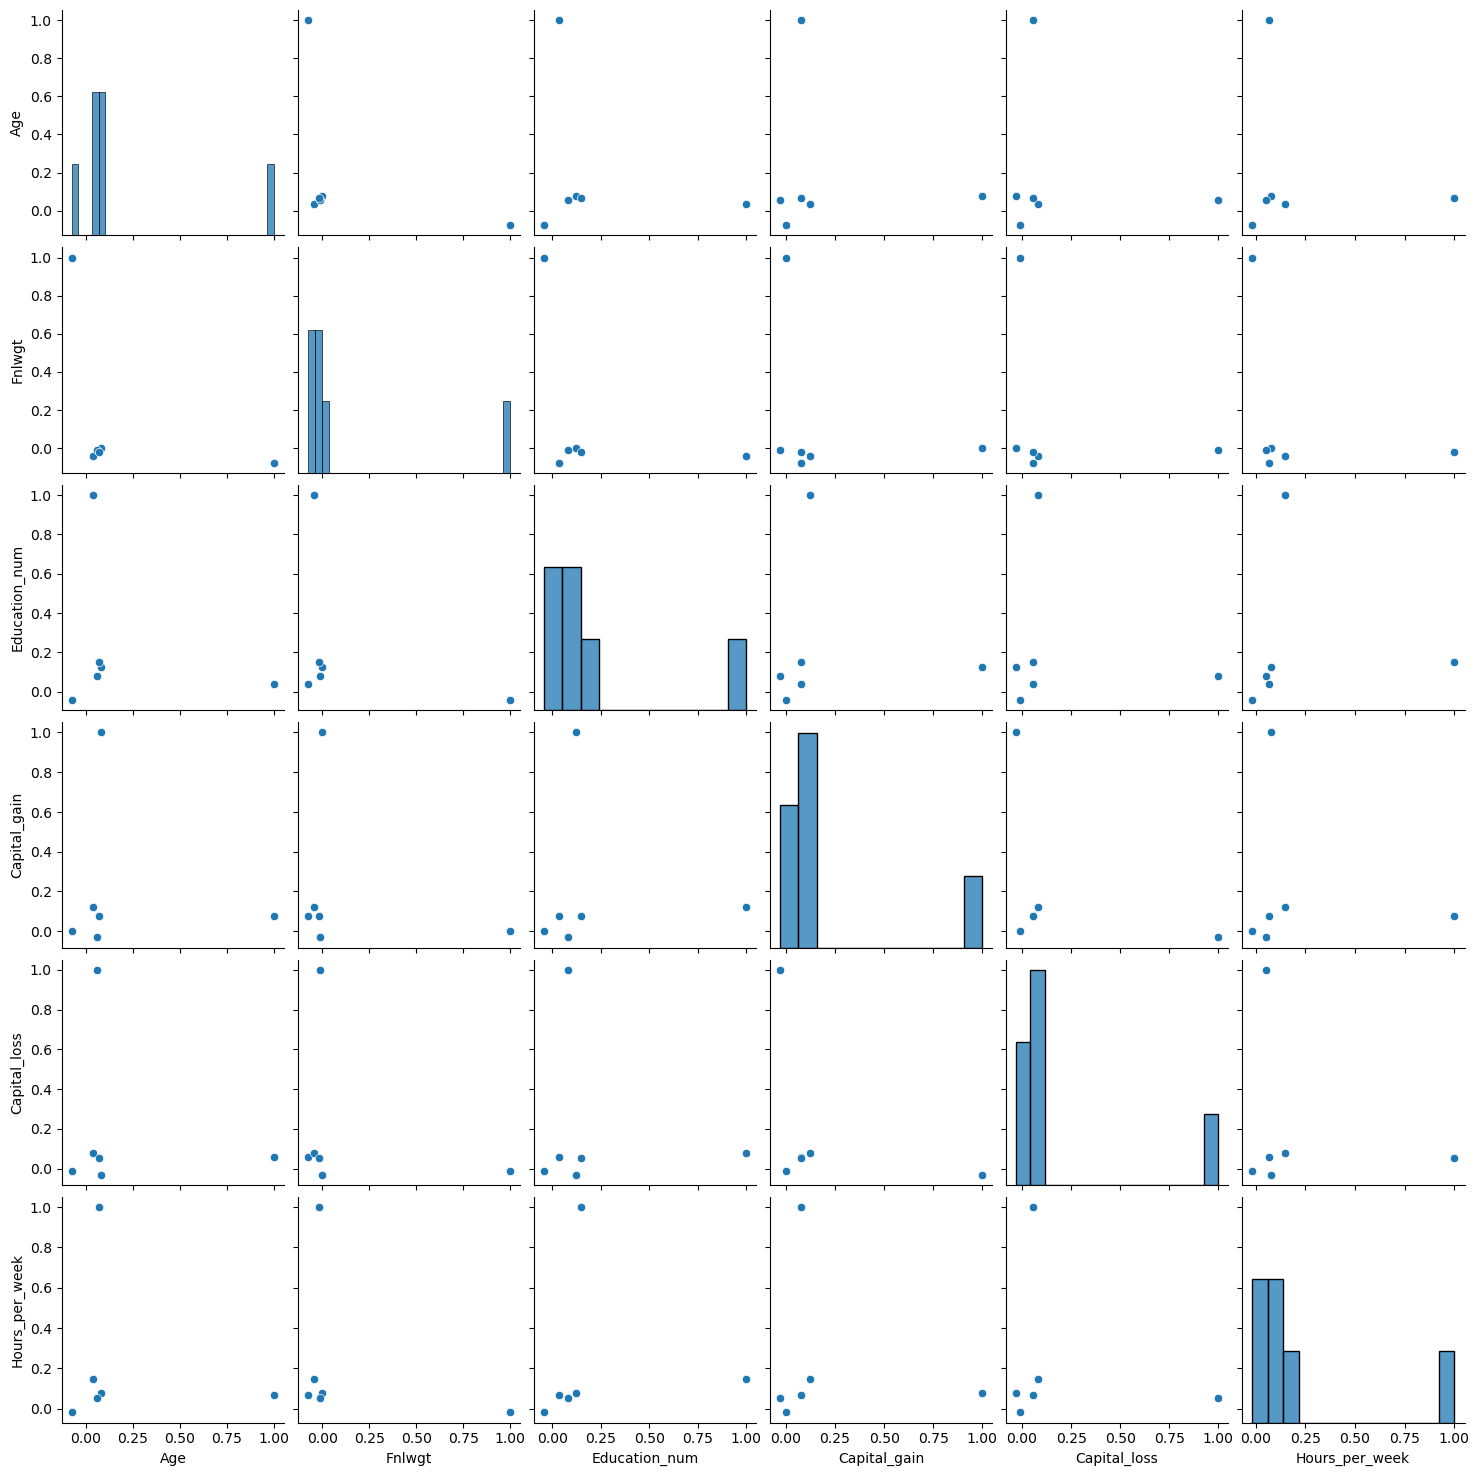

In [309]:
sns.pairplot(df.corr())

In [310]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

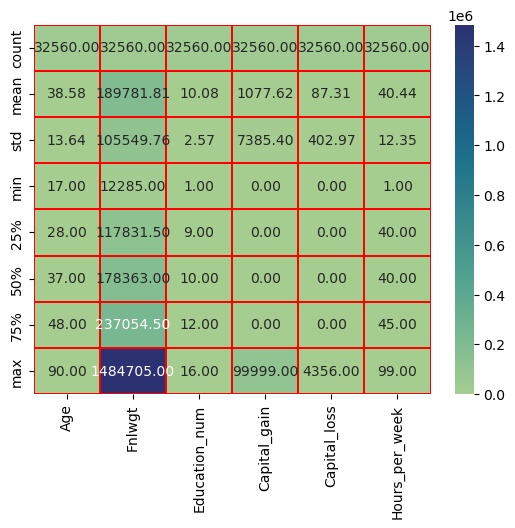

In [311]:
sns.heatmap(df.describe(), annot= True, fmt= '0.2f',linewidth =0.2, linecolor='red', cmap='crest')

In [312]:
# checking blank values in target vairable
df.loc[df['Income'] == ' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [313]:
#there isno blank values

In [314]:
# as well our dataset is of mix values of numeric and non-numeric so need to use Lable Encoding to convert Non-numeric to Numeric

In [315]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [317]:
# checking corelations of all of the columns
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


In [318]:
#checking correlation with income
df.corr()['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

In [319]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [320]:
# from above we can see that 'Relationship', 'Marital_status' and 'Fnlwght' has -ve relation with 'Income'

In [321]:
# checking skweness in our data
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [322]:
#ideal skewness should be between +0.5 to -0.5. so we need to remove skweness from our data

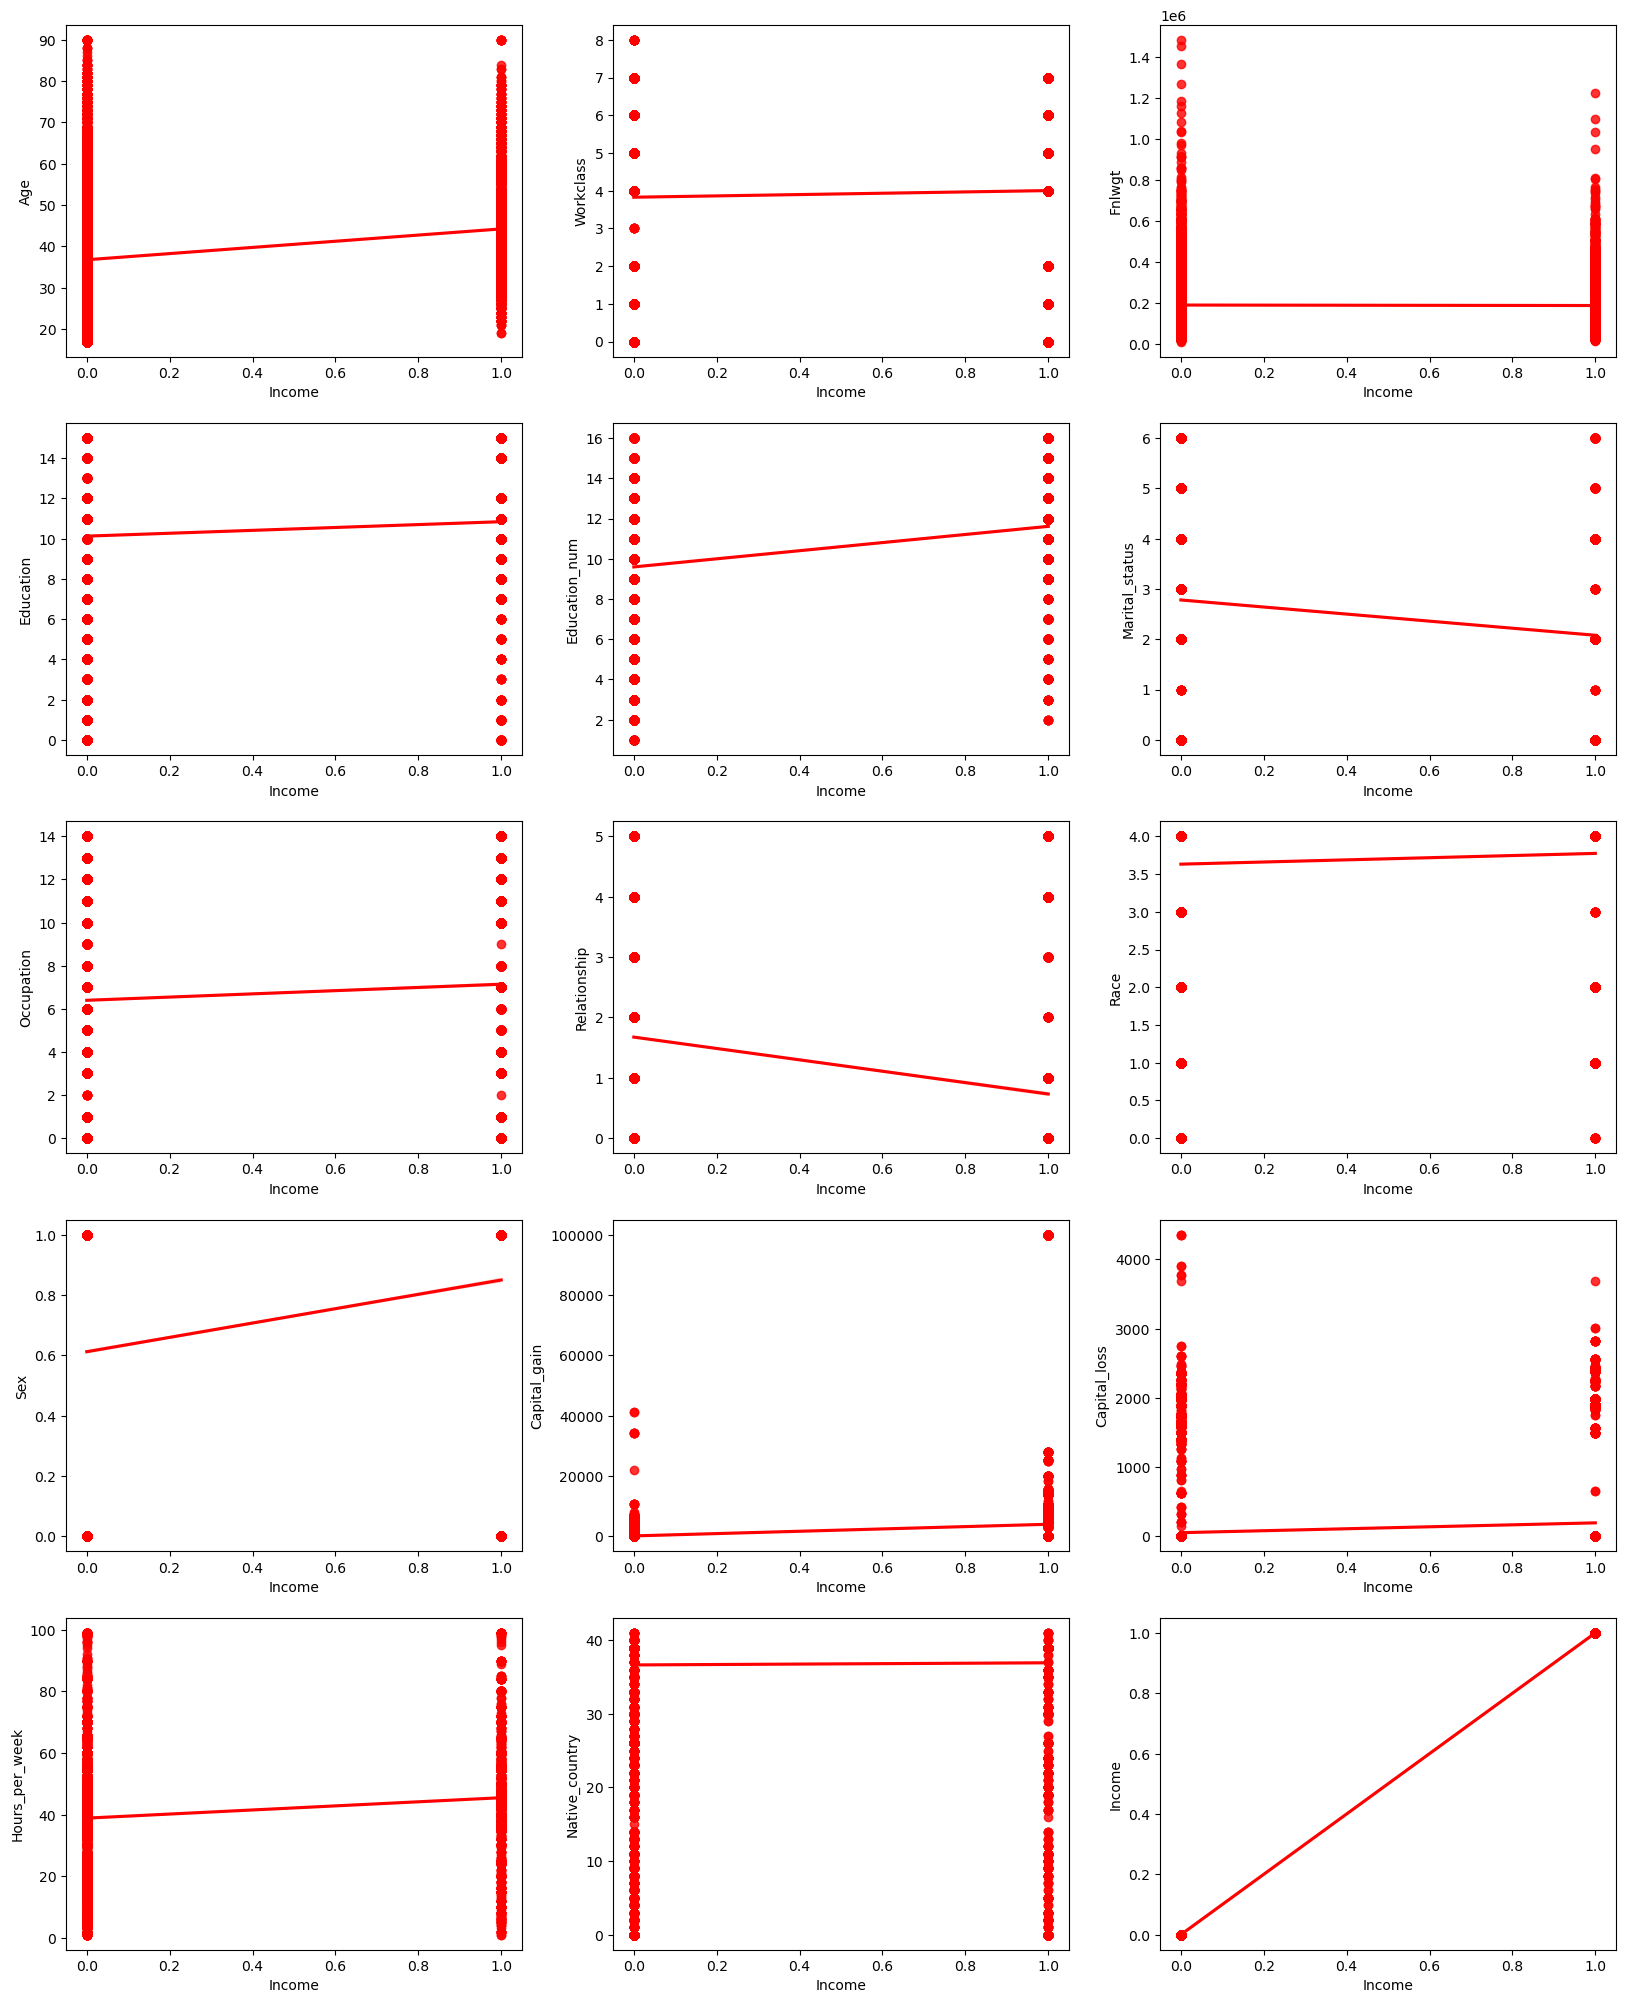

In [323]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=15:
        plt.subplot(5,3,p)
        sns.regplot(x= 'Income', y = i, data = df, color= 'red')
        
    p+=1
plt.show()

In [324]:
# from above we can see taht 'Native_country', 'Capital_gain', 'Capital_loss' has not musch impact on 'Income' hence we will remove that
#before that we will check for outliers 

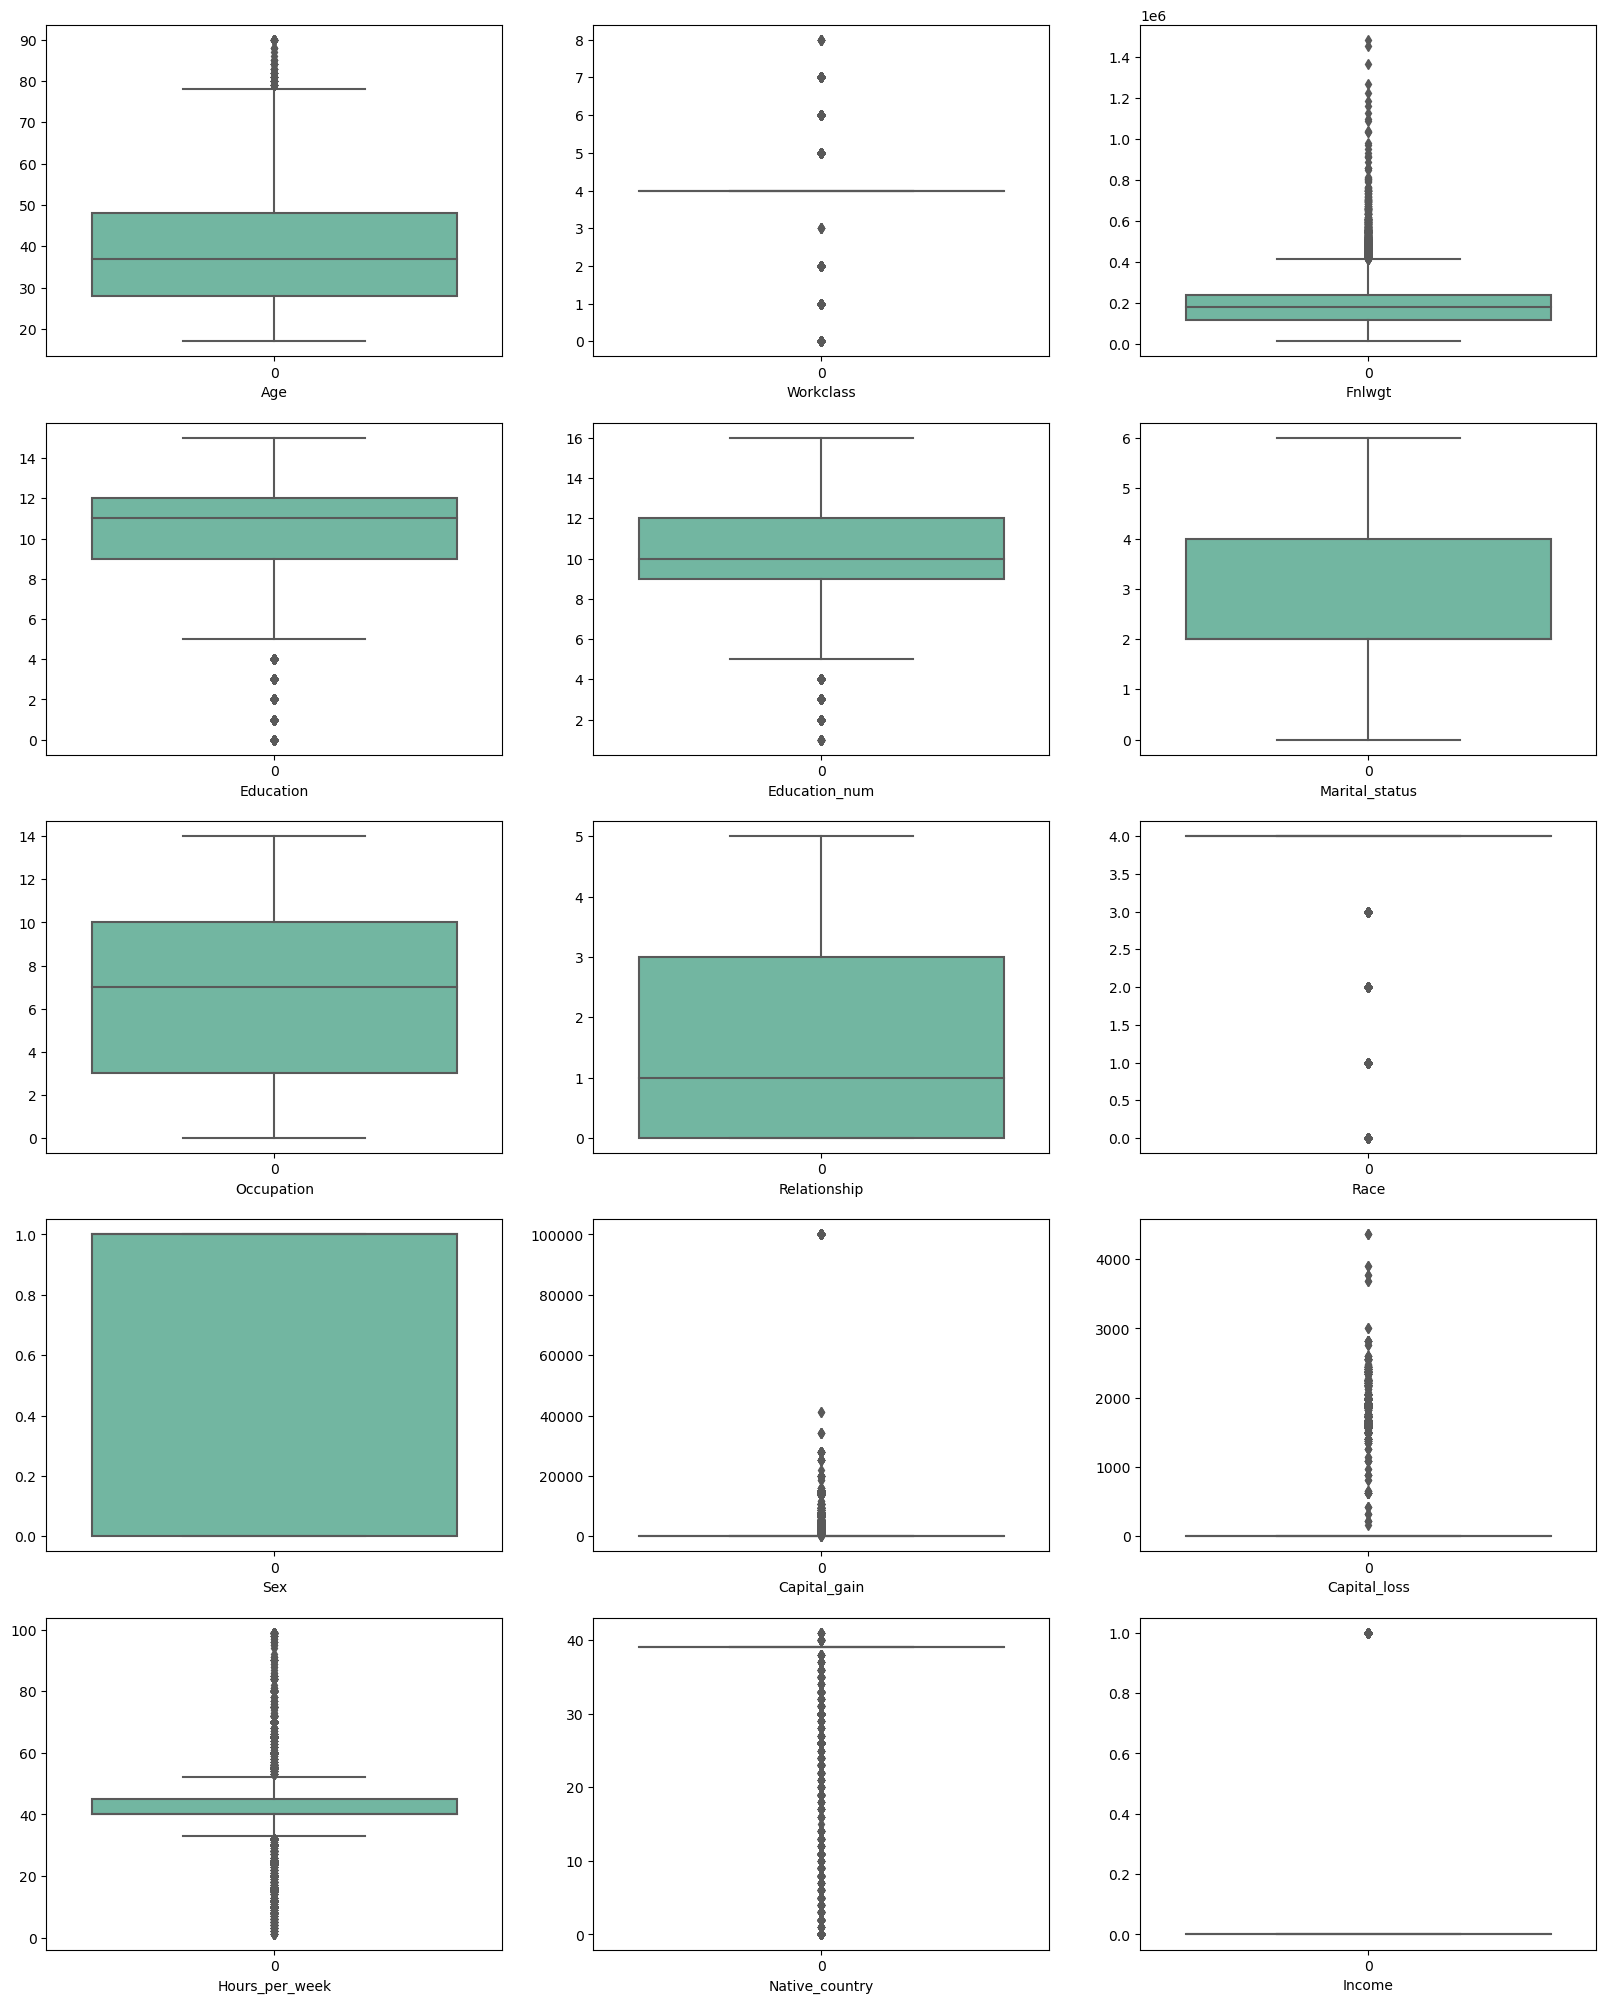

In [325]:
plt.figure(figsize=(20,25))
p = 1
for i in df:
    if p<=15:
        plt.subplot(5,3,p)
        sns.boxplot(df[i], palette = 'Set2')
        plt.xlabel(i)
    p+=1
plt.show()

In [326]:
# from above we can confirm that we can remove some of the columns as mentioned above

In [327]:
df.drop(['Capital_gain','Capital_loss','Native_country'], axis=1, inplace=True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,6,83311,9,13,2,4,0,4,1,13,0
1,38,4,215646,11,9,0,6,1,4,1,40,0
2,53,4,234721,1,7,2,6,0,2,1,40,0
3,28,4,338409,9,13,2,10,5,2,0,40,0
4,37,4,284582,12,14,2,4,5,4,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,38,0
32556,40,4,154374,11,9,2,7,0,4,1,40,1
32557,58,4,151910,11,9,6,1,4,4,0,40,0
32558,22,4,201490,11,9,4,1,3,4,1,20,0


In [328]:
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Income            1.212383
dtype: float64

In [329]:
# we will use Zscore method to remove skewness and outliers from our data

In [330]:
from scipy.stats import zscore

In [331]:
z =zscore(df)
abs_score = np.abs(z)
df_new = df[(abs_score<3).all(axis=1)]
df_new.shape

(30154, 12)

In [332]:
df.shape

(32560, 12)

In [333]:
#checking total dataloss
print('Data loss after applying Z-score :',2406/32560*100,'%')

Data loss after applying Z-score : 7.38943488943489 %


In [334]:
# so we have 7.389% data loss

In [335]:
df=df_new

In [336]:
df.skew()

Age               0.466064
Workclass        -0.745559
Fnlwgt            0.626688
Education        -0.951331
Education_num    -0.153403
Marital_status   -0.021850
Occupation        0.119202
Relationship      0.785082
Race             -2.613769
Sex              -0.711156
Hours_per_week   -0.346692
Income            1.203841
dtype: float64

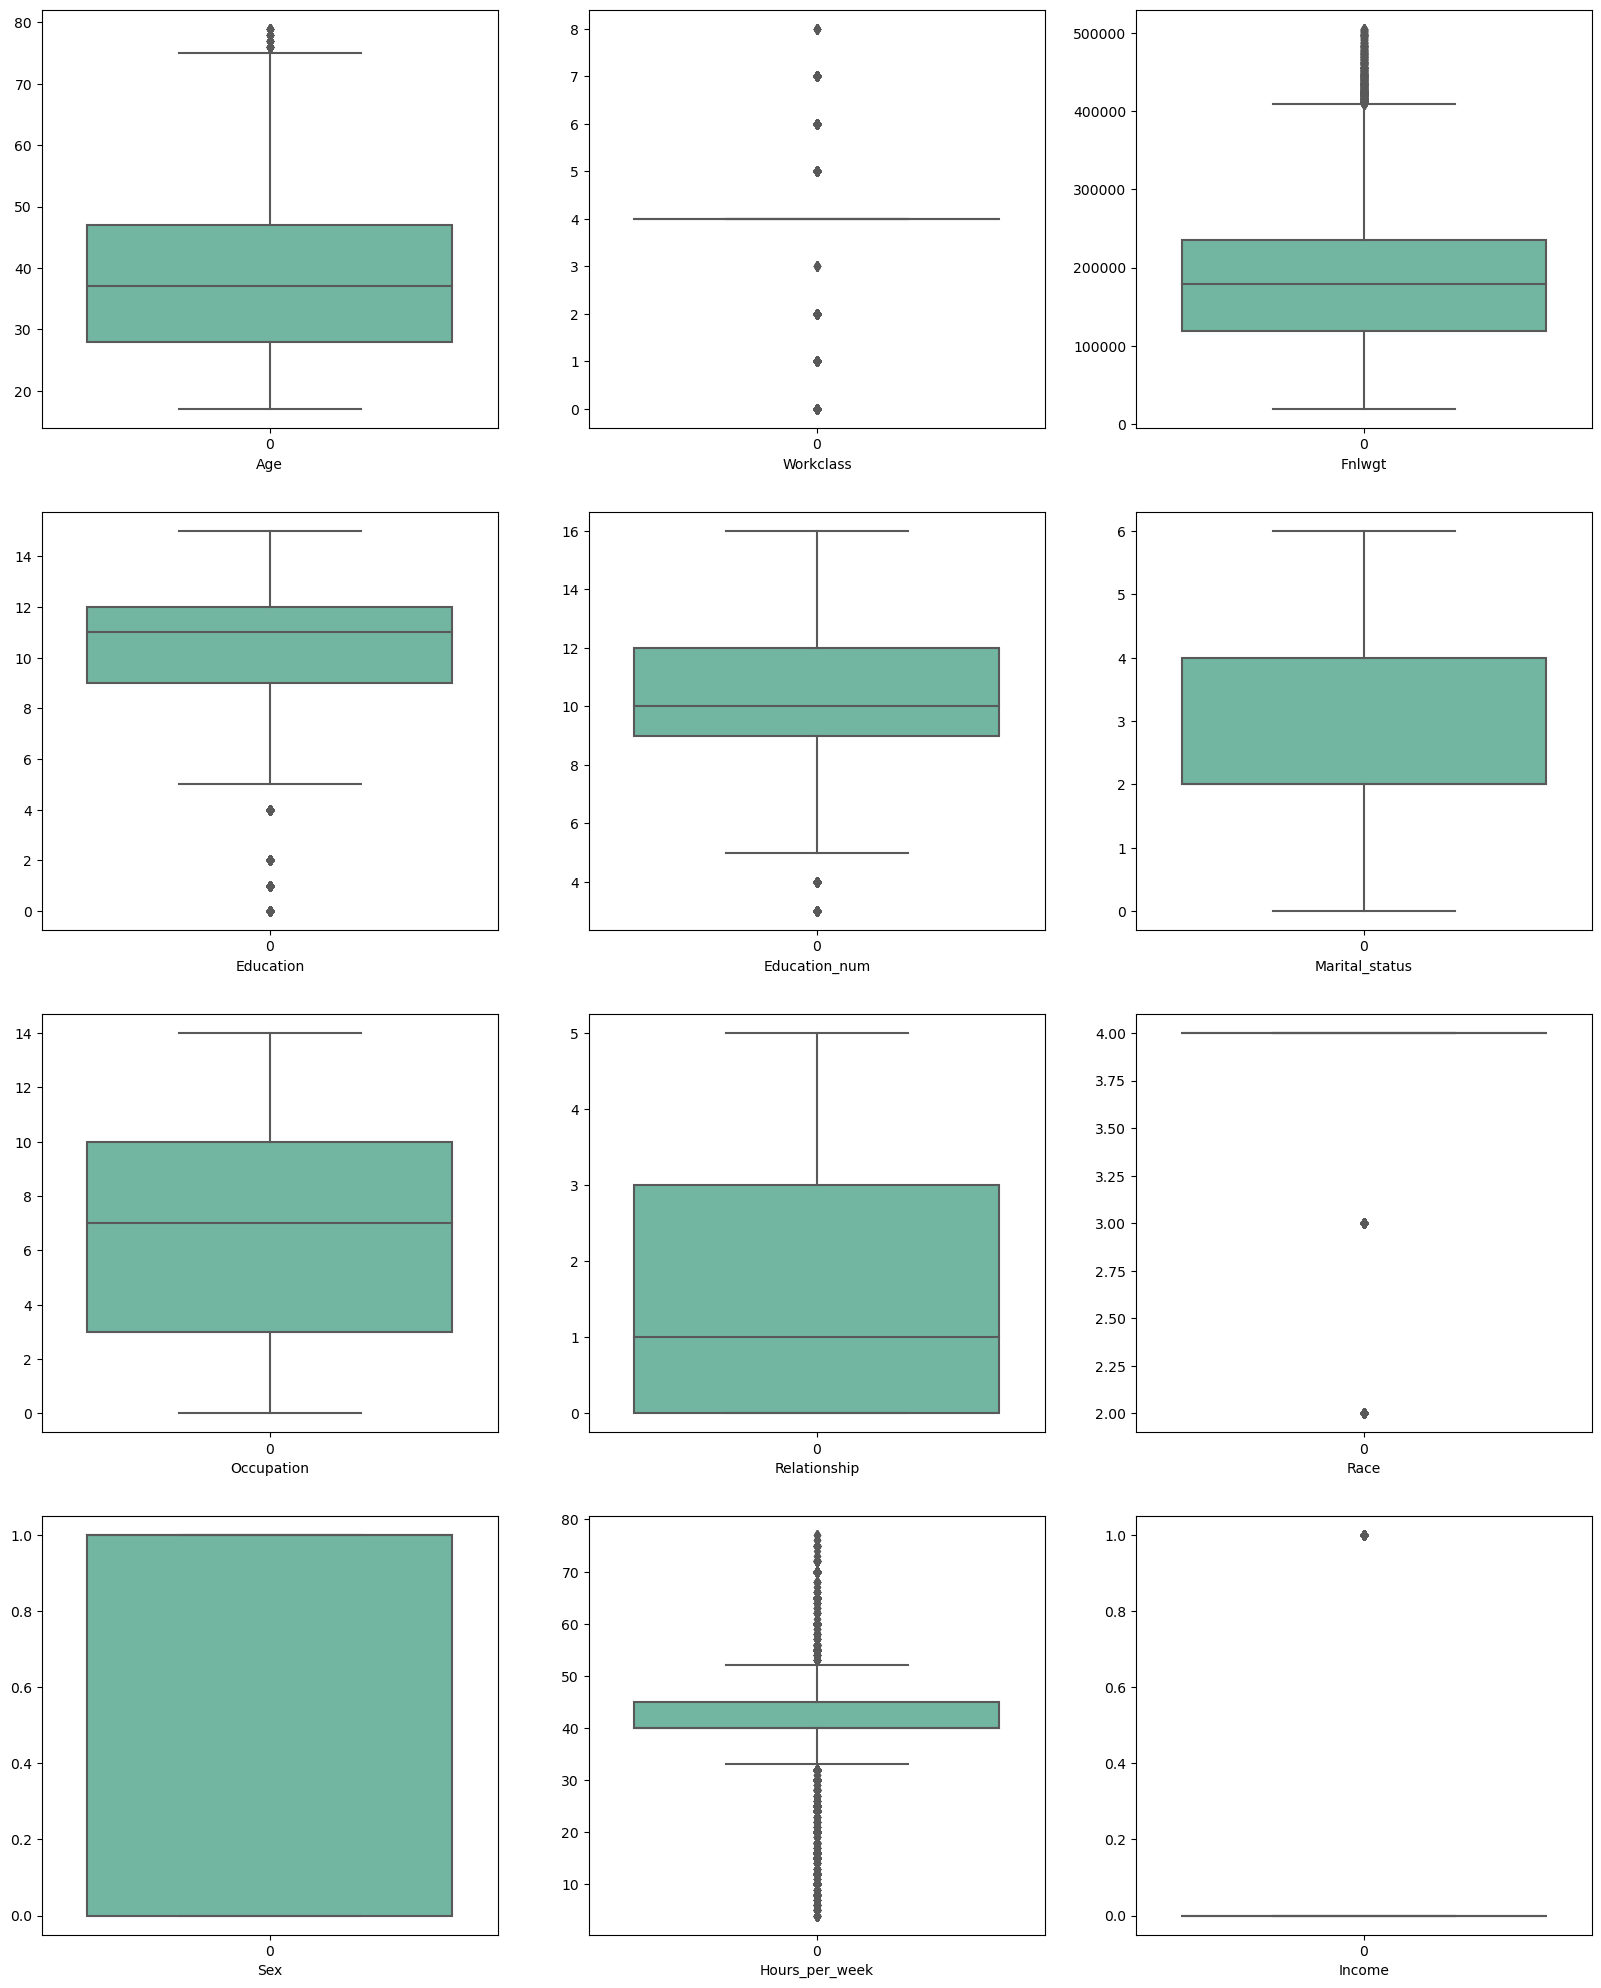

In [337]:
plt.figure(figsize=(20,25))
p = 1
for i in df:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(df[i], palette = 'Set2')
        plt.xlabel(i)
    p+=1
plt.show()

In [338]:
# still we have skewness in our data
# we will use power_transform

In [339]:
from sklearn.preprocessing import power_transform

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]


x_new=power_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new['Income']=y

df=x_new
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,0.909480,1.655922,-1.133103,-0.489571,1.184136,-0.377148,-0.502020,-1.094601,0.346420,0.705771,-2.225629,0.0
1,0.105414,0.011491,0.410515,0.080422,-0.474979,-1.771598,-0.011834,0.134609,0.346420,0.705771,-0.055368,0.0
2,1.086808,0.011491,0.591553,-2.079938,-1.256179,-0.377148,-0.011834,-1.094601,-2.890294,0.705771,-0.055368,0.0
3,-0.730879,0.011491,1.477924,-0.489571,1.184136,-0.377148,0.829850,1.548422,-2.890294,-1.416891,-0.055368,0.0
4,0.029966,0.011491,1.035888,0.386714,1.616073,-0.377148,-0.502020,1.548422,0.346420,-1.416891,-0.055368,0.0


In [340]:
df.skew()

Age              -0.020633
Workclass         0.074103
Fnlwgt           -0.033350
Education        -0.306944
Education_num     0.021840
Marital_status   -0.119040
Occupation       -0.184653
Relationship      0.123206
Race             -2.540428
Sex              -0.711156
Hours_per_week    0.104960
Income            1.208036
dtype: float64

In [341]:
#getting data ready for model

In [342]:
#seperating 'Income'(target column) from rest of the columns

In [343]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,0.909480,1.655922,-1.133103,-0.489571,1.184136,-0.377148,-0.502020,-1.094601,0.346420,0.705771,-2.225629,0.0
1,0.105414,0.011491,0.410515,0.080422,-0.474979,-1.771598,-0.011834,0.134609,0.346420,0.705771,-0.055368,0.0
2,1.086808,0.011491,0.591553,-2.079938,-1.256179,-0.377148,-0.011834,-1.094601,-2.890294,0.705771,-0.055368,0.0
3,-0.730879,0.011491,1.477924,-0.489571,1.184136,-0.377148,0.829850,1.548422,-2.890294,-1.416891,-0.055368,0.0
4,0.029966,0.011491,1.035888,0.386714,1.616073,-0.377148,-0.502020,1.548422,0.346420,-1.416891,-0.055368,0.0


In [344]:
X=df.drop('Income', axis=1)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week
0,0.909480,1.655922,-1.133103,-0.489571,1.184136,-0.377148,-0.502020,-1.094601,0.346420,0.705771,-2.225629
1,0.105414,0.011491,0.410515,0.080422,-0.474979,-1.771598,-0.011834,0.134609,0.346420,0.705771,-0.055368
2,1.086808,0.011491,0.591553,-2.079938,-1.256179,-0.377148,-0.011834,-1.094601,-2.890294,0.705771,-0.055368
3,-0.730879,0.011491,1.477924,-0.489571,1.184136,-0.377148,0.829850,1.548422,-2.890294,-1.416891,-0.055368
4,0.029966,0.011491,1.035888,0.386714,1.616073,-0.377148,-0.502020,1.548422,0.346420,-1.416891,-0.055368
...,...,...,...,...,...,...,...,...,...,...,...
30149,-0.826490,0.011491,0.797546,-0.998735,0.758643,-0.377148,1.385103,1.548422,0.346420,-1.416891,-0.237230
30150,0.251853,0.011491,-0.226286,0.080422,-0.474979,-0.377148,0.212819,-1.094601,0.346420,0.705771,-0.055368
30151,1.365828,0.011491,-0.254074,0.080422,-0.474979,2.175521,-1.418399,1.350949,0.346420,-1.416891,-0.055368
30152,-1.349442,0.011491,0.271481,0.080422,-0.474979,0.924066,-1.418399,1.090817,0.346420,0.705771,-1.731662


In [345]:
Y=df['Income']
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30149    0.0
30150    0.0
30151    NaN
30152    0.0
30153    0.0
Name: Income, Length: 30154, dtype: float64

In [346]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [347]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.30)

In [348]:
#VIF

In [349]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

          Variable       VIF
0              Age  1.269048
1        Workclass  1.087611
2           Fnlwgt  1.017426
3        Education  1.086167
4    Education_num  1.144129
5   Marital_status  1.173260
6       Occupation  1.094586
7     Relationship  1.941345
8             Race  1.047069
9              Sex  1.660777
10  Hours_per_week  1.153782


In [350]:
from sklearn.decomposition import PCA

In [351]:
pca =PCA(n_components =10)
X_pca =pca.fit_transform(X)

In [352]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] =[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

          Variable       VIF
0              Age  1.269048
1        Workclass  1.087611
2           Fnlwgt  1.017426
3        Education  1.086167
4    Education_num  1.144129
5   Marital_status  1.173260
6       Occupation  1.094586
7     Relationship  1.941345
8             Race  1.047069
9              Sex  1.660777
10  Hours_per_week  1.153782


In [353]:
#Scaling data with MINMAX

In [354]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[ 0.90947963,  1.65592173, -1.13310265, ...,  0.34642013,
         0.70577056, -2.22562882],
       [ 0.10541385,  0.01149103,  0.41051545, ...,  0.34642013,
         0.70577056, -0.05536765],
       [ 1.0868081 ,  0.01149103,  0.59155267, ..., -2.89029434,
         0.70577056, -0.05536765],
       ...,
       [ 1.36582793,  0.01149103, -0.25407416, ...,  0.34642013,
        -1.41689107, -0.05536765],
       [-1.34944151,  0.01149103,  0.27148075, ...,  0.34642013,
         0.70577056, -1.73166197],
       [ 1.02858024,  0.79986179,  1.0643943 , ...,  0.34642013,
        -1.41689107, -0.05536765]])

In [355]:
#finding best random state

In [356]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30154 entries, 0 to 30153
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
27938 non-null  float64
dtypes: float64(1)
memory usage: 235.7 KB


In [357]:
Y.isnull().sum()

2216

In [358]:
Y= Y.fillna(0)
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30154 entries, 0 to 30153
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
30154 non-null  float64
dtypes: float64(1)
memory usage: 235.7 KB


In [359]:
max_acc = 0
max_rs = 0

for i in range(1, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_report = accuracy_score(Y_test, pred)
    
    if acc_report > max_acc:
        max_acc = acc_report
        max_rs = i
    print("Accuracy Score at Random State", i, "is", acc_report)
print("Maximum Accuracy Score is", max_acc, "at Random State", max_rs)

Accuracy Score at Random State 1 is 0.7773847684315243
Accuracy Score at Random State 2 is 0.7829114623632143
Accuracy Score at Random State 3 is 0.7783795733392285
Accuracy Score at Random State 4 is 0.7807007847905383
Accuracy Score at Random State 5 is 0.7774953023101581
Accuracy Score at Random State 6 is 0.7798165137614679
Accuracy Score at Random State 7 is 0.768652592019454
Accuracy Score at Random State 8 is 0.7746214214656792
Accuracy Score at Random State 9 is 0.7833535978777495
Accuracy Score at Random State 10 is 0.7750635569802145
Accuracy Score at Random State 11 is 0.7750635569802145
Accuracy Score at Random State 12 is 0.7772742345528905
Accuracy Score at Random State 13 is 0.7769426329169891
Accuracy Score at Random State 14 is 0.7792638443682989
Accuracy Score at Random State 15 is 0.7742898198297778
Accuracy Score at Random State 16 is 0.771415938985299
Accuracy Score at Random State 17 is 0.7772742345528905
Accuracy Score at Random State 18 is 0.7750635569802145
Acc

In [360]:
#Maximum Accuracy Score is 0.7852326738145241 at Random State 197

In [361]:
#Logistic Regression

In [362]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3, random_state =197)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print("Accuracy Score - ", accuracy_score(pred,Y_test))
print("Confusion Matrix -", confusion_matrix(pred,Y_test))
print("Classfication Reports -", classification_report(pred,Y_test))

Accuracy Score -  0.7852326738145241
Confusion Matrix - [[7104 1943]
 [   0    0]]
Classfication Reports -               precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      9047
         1.0       0.00      0.00      0.00         0

    accuracy                           0.79      9047
   macro avg       0.50      0.39      0.44      9047
weighted avg       1.00      0.79      0.88      9047



In [363]:
#Decession Tree Classifier

In [364]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.6502708080026528
Confusion Matrix  [[5392 1452]
 [1712  491]]
Classfication Reports                precision    recall  f1-score   support

         0.0       0.76      0.79      0.77      6844
         1.0       0.25      0.22      0.24      2203

    accuracy                           0.65      9047
   macro avg       0.51      0.51      0.51      9047
weighted avg       0.64      0.65      0.64      9047



In [365]:
#KNN

In [366]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.7362661655797502
Confusion Matrix  [[6518 1800]
 [ 586  143]]
Classfication Reports                precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      8318
         1.0       0.07      0.20      0.11       729

    accuracy                           0.74      9047
   macro avg       0.50      0.49      0.48      9047
weighted avg       0.85      0.74      0.79      9047



In [367]:
#Random Forest Classifier

In [368]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.771415938985299
Confusion Matrix  [[6924 1888]
 [ 180   55]]
Classfication Reports                precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      8812
         1.0       0.03      0.23      0.05       235

    accuracy                           0.77      9047
   macro avg       0.50      0.51      0.46      9047
weighted avg       0.95      0.77      0.85      9047



In [369]:
#Ada Boost Classifier

In [370]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
pred=abc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.7844589366640875
Confusion Matrix  [[7097 1943]
 [   7    0]]
Classfication Reports                precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      9040
         1.0       0.00      0.00      0.00         7

    accuracy                           0.78      9047
   macro avg       0.50      0.39      0.44      9047
weighted avg       1.00      0.78      0.88      9047



In [371]:
#Gradient Boosting Classifier

In [372]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.7843484027854537
Confusion Matrix  [[7096 1943]
 [   8    0]]
Classfication Reports                precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      9039
         1.0       0.00      0.00      0.00         8

    accuracy                           0.78      9047
   macro avg       0.50      0.39      0.44      9047
weighted avg       1.00      0.78      0.88      9047



In [373]:
#CVS with LR

In [374]:
from sklearn.model_selection import cross_val_score
cv_score1=cross_val_score(lr,X ,Y, cv=5)
print("Cross Validation score is", cv_score1)
print("Mean of Cross Validation score is", cv_score1.mean())
print("Standard Deviation of Cross Validation score is", cv_score1.std())

Cross Validation score is [0.77632233 0.77632233 0.77615652 0.77615652 0.77628524]
Mean of Cross Validation score is 0.7762485917837992
Standard Deviation of Cross Validation score is 7.638305739327652e-05


In [375]:
#CVS with DTC

In [376]:
cv_score2=cross_val_score(dtc,X ,Y, cv=5)
print("Cross Validation score is", cv_score2)
print("Mean of Cross Validation score is", cv_score2.mean())
print("Standard Deviation of Cross Validation score is", cv_score2.std())

Cross Validation score is [0.64931189 0.64052396 0.64019234 0.63671033 0.63897181]
Mean of Cross Validation score is 0.6411420650574573
Standard Deviation of Cross Validation score is 0.00429837975281334


In [377]:
#CVS with KNN

In [378]:
cv_score3=cross_val_score(knn,X ,Y, cv=5)
print("Cross Validation score is", cv_score3)
print("Mean of Cross Validation score is", cv_score3.mean())
print("Standard Deviation of Cross Validation score is", cv_score3.std())

Cross Validation score is [0.73619632 0.73105621 0.72740839 0.73619632 0.73067993]
Mean of Cross Validation score is 0.7323074342541424
Standard Deviation of Cross Validation score is 0.0034194094669387186


In [379]:
#CVS with RFC

In [380]:
cv_score4=cross_val_score(rfc,X ,Y, cv=5)
print("Cross Validation score is", cv_score4)
print("Mean of Cross Validation score is", cv_score4.mean())
print("Standard Deviation of Cross Validation score is", cv_score4.std())

Cross Validation score is [0.76372078 0.76256011 0.76206268 0.76189687 0.76218905]
Mean of Cross Validation score is 0.7624858958399843
Standard Deviation of Cross Validation score is 0.0006549231423962515


In [381]:
# CVS with AdaBoost Classifier

In [382]:
cv_score5=cross_val_score(abc,X ,Y, cv=5)
print("Cross Validation score is", cv_score5)
print("Mean of Cross Validation score is", cv_score5.mean())
print("Standard Deviation of Cross Validation score is", cv_score5.std())

Cross Validation score is [0.77615652 0.77599071 0.7758249  0.77615652 0.7761194 ]
Mean of Cross Validation score is 0.7760496143061842
Standard Deviation of Cross Validation score is 0.00012782307089751605


In [383]:
#CVS with GBC

In [384]:
cv_score6=cross_val_score(gbc,X ,Y, cv=5)
print("Cross Validation score is", cv_score6)
print("Mean of Cross Validation score is", cv_score6.mean())
print("Standard Deviation of Cross Validation score is", cv_score6.std())

Cross Validation score is [0.7758249  0.77599071 0.77549328 0.77549328 0.77628524]
Mean of Cross Validation score is 0.7758174858312208
Standard Deviation of Cross Validation score is 0.00030300838564614675


In [385]:
# now as we know that higher mean CVS indicates better average performance.
#Standard Deviation of CVS- lover score indicates more stable and consistent performance

In [386]:
print('Mean CVS Score','\n','For LR', cv_score1.mean(),'\n','For DTC',cv_score2.mean(), '\n',
       'For KNN',cv_score3.mean(),'\n','For RFC',cv_score4.mean(),'\n',
       'For AdaBoost',cv_score5.mean(),'\n','For GBC',cv_score6.mean() )

Mean CVS Score 
 For LR 0.7762485917837992 
 For DTC 0.6411420650574573 
 For KNN 0.7323074342541424 
 For RFC 0.7624858958399843 
 For AdaBoost 0.7760496143061842 
 For GBC 0.7758174858312208


In [387]:
print('Standard Deviation of CVS:','\n','For LR',cv_score1.std(),'\n',
     'For DTC ', cv_score2.std(),'\n','For KNN ',cv_score3.std(),'\n',
     'For RFC ',cv_score4.std(),'\n','For AdaBoost ',cv_score5.std(),
     '\n','For GBC', cv_score6.std())

Standard Deviation of CVS: 
 For LR 7.638305739327652e-05 
 For DTC  0.00429837975281334 
 For KNN  0.0034194094669387186 
 For RFC  0.0006549231423962515 
 For AdaBoost  0.00012782307089751605 
 For GBC 0.00030300838564614675


In [388]:
# So from above scores we can go with Gradient Boost Classifier model

In [389]:
#Hyper Parameter Tuning

In [390]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=197)

gb_classifier = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

KeyboardInterrupt: 

In [391]:
#Grid Search is taking very long time so I have interped kernal inbtween

In [392]:
#Trying Random Search CV

In [393]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, Y_train)
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_
Y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(Y_test, Y_pred_random)

print("Best Hyperparameters (Random Search):", best_params_random)
print("Accuracy on Test Set (Random Search):", accuracy_random)

Best Hyperparameters (Random Search): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy on Test Set (Random Search): 0.7831325301204819


In [394]:
#Finalizing Model

In [395]:
gbc=GradientBoostingClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_depth= 5, learning_rate= 0.1)
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.7834641317563833
Confusion Matrix  [[7087 1942]
 [  17    1]]
Classfication Reports                precision    recall  f1-score   support

         0.0       1.00      0.78      0.88      9029
         1.0       0.00      0.06      0.00        18

    accuracy                           0.78      9047
   macro avg       0.50      0.42      0.44      9047
weighted avg       1.00      0.78      0.88      9047



In [396]:
#AUC:ROC Curve

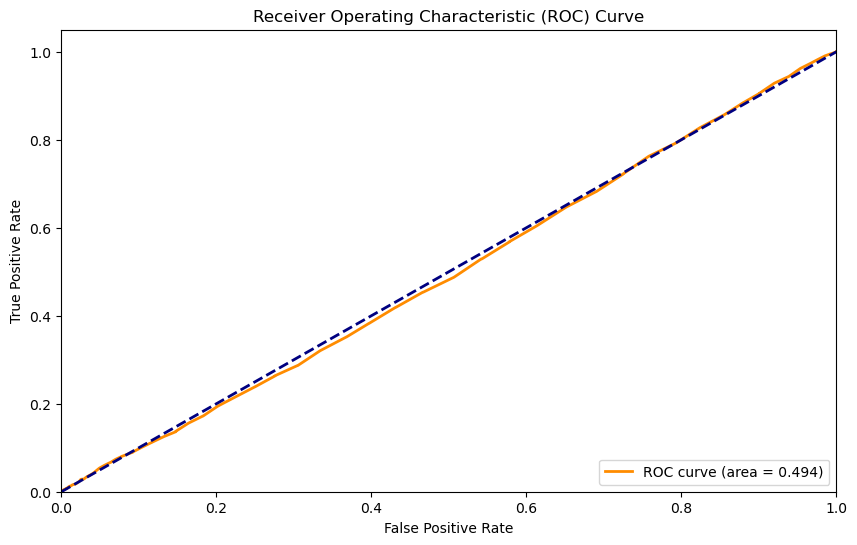

In [401]:
from sklearn.metrics import roc_curve, auc

# Assuming you have true labels (y_true) and predicted probabilities (y_probs) from your model
y_probs = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [398]:
# Saving model

In [403]:
import pickle
filename = 'Census_Income_KM.pkl'
pickle.dump(gbc,open(filename,'wb'))

In [404]:
loaded_model = pickle.load(open('Census_Income_KM.pkl','rb'))
result = loaded_model.score(X_test,Y_test)
print(result*100)

78.34641317563833
